## Эмпирическая функция распределения. Поведение в точке.

### Цель работы:
- ознакомится с определением ЭФР и ее поведением при фиксированном значении аргумента
- аналитически и графически оценить надежность асимптотического интервала
- убедиться в том, что асимптотические методы работают при конечном объеме выборки

### Задание и ход работы:
 
- Выбрать параметры 2-х из 3-х распределений генеральной совокупности $X$:

> $X$ ~ $U(a, b)$
>
> $X$ ~ $e^u$
>
> $X$ ~ $N(a, \sigma ^2)$ 

- Выбрать такую точку $t_0$, что $ 0.05 < F_X(t_0) < 0.95$. Вычислить $F_X(t_0)$

- Смоделировать $m = 10^2$ выборок объема $n = 10^4$ для каждого из двух выбранных распределений.
- Для каждой выборки построить $F_n(t_0)$ - значение эмпирической функции распределения в точке $t_0$ - оценку значения функции распределения в точке $t_0$, то есть величины $F_X(t_0)$.
- Для каждого из распределений получите 100 оценок величины $F_X(t_0)$.

- Значение функции распределения $\displaystyle F_X(t_0) = P(X \in (-\infty, t_0) = \Delta)$ является вероятностью события $\displaystyle A = {X \in (-\infty, t_0)}.$
- Значение эмпирической функции распределения $F_n(t_0)$ - оценка вероятности события $\displaystyle A = {\displaystyle X \in (-\infty, t_0)}$, то есть $\displaystyle k(\Delta) \over \displaystyle n$ - частота попадания значения случайной величины $X$ в интервал $\Delta$.

> Частота, полученная по серии независимых однотипных испытаний с двумя исходами – $\displaystyle A$ и
$\displaystyle \bar A$, является состоятельной, несмещенной, асимптотически нормальной оценкой
вероятности события.
Свойство асимптотической нормальности позволяет строить
асимптотический доверительный интервал надежности $\gamma$.

- Фиксировать $\displaystyle \gamma > 0.9$ и построить по $\displaystyle 100$ асимптотических доверительных интервалов надежности $\displaystyle \gamma$ для
значения $\displaystyle F_X(t_0)$ для каждого из выбранных распределений.

- Построить $2$ графика – по оси $x$ - номер выборки, по оси $y$ – соответствующие левый и правый концы асимптотических доверительных интервалов и значение $\displaystyle F_X(t_0)$.

- Найти количество $\displaystyle \sigma_n$ асимптотических доверительных интервалов, в которые значение $\displaystyle F_X(t_0)$ не попало. Сравнить среднее количество $\displaystyle \sigma_n$ для $k = 100$ серий $\displaystyle (mean(\sigma_n))$ с величиной $\displaystyle 1 - \gamma$

> $\displaystyle \sigma_n$ можно рассматривать как оценку величины $\displaystyle 1 - \gamma$ для различных $\displaystyle \gamma$ = $\displaystyle 0.9, 0.91, ... , 0.99$.

In [12]:
clear -all
pkg load statistics
pkg load econometrics
graphics_toolkit("gnuplot")

In [13]:
global m = 10^2;
global n = 10^4;
global t0 = 0.5;
global figure_number = 1;

In [14]:
function f = draw(distribution, gamma = 0.95)
    global m figure_number
    [value, I, FX, name] = distribution(gamma);
    f = figure(figure_number++, "position", get(0, "screensize"));
    plot(1:m, I(1, :), "k",
         1:m, I(2, :), "k",
         1:m, linspace(FX, FX), "r")
    title_name = strcat(name, ": gamma=", num2str(gamma));
    title(title_name);
    xlabel("m")
    ylabel("I")
    pause(0.01);
end

In [15]:
% SE = sigma / sqrt(n)
% F(x) - empirical distribution function(EDF) => sigma^2 = F(t0) * (1 - F(t0))

In [16]:
global mu = 0;
global sigma = 1;

function [value, I, FX, name] = normal_distribution(gamma)
    global m n t0 mu sigma;
    T = norminv((1 + gamma) / 2);
    X = normrnd(mu, sigma, n, m);
    FX = normcdf(t0, mu, sigma);
    SE = T * sqrt(FX) * sqrt(1 - FX) / sqrt(n);
    FX_t0 = mean(X < t0);
    I = [FX_t0 - SE; FX_t0 + SE];
    l = sum(I(1, :) > FX);
    r = sum(I(2, :) < FX);
    value = l + r;
    name = strcat("Normal distribution(", num2str(mu), ",", num2str(sigma), ")");
end

In [17]:
global u = 2;

function [value, I, FX, name] = exponential_distribution(gamma)
    global m n t0 u;
    T = norminv((1 + gamma) / 2);
    X = exprnd(u, n, m);
    FX = expcdf(t0, u);
    SE = T * sqrt(FX) * sqrt(1 - FX) / sqrt(n);
    FX_t0 = mean(X < t0);
    I = [FX_t0 - SE; FX_t0 + SE];
    l = sum(I(1, :) > FX);
    r = sum(I(2, :) < FX);
    value = l + r;
    name = strcat("Exponential distribution(", num2str(u), ")");
end

In [18]:
function analyse(distribution)
    global m;
    ans = [];
    name = "";
    for i = 1:10
        gamma = 0.9 + (i - 1) * 0.01;
        total = [];
        for j = 1:m
            [value, ~, ~, name] = distribution(gamma);
            total(j) = value;
        end
    ans = [ans; gamma, mean(total)];
    end
    printf("%s \n\n", name)
    prettyprint_c(ans, ["Gamma"; "Mean"])
end

In [19]:
analyse(@(gamma) exponential_distribution(gamma))

Exponential distribution(2) 

     Gamma      Mean  
     0.900     9.960
     0.910     9.070
     0.920     8.350
     0.930     6.750
     0.940     6.090
     0.950     4.930
     0.960     3.900
     0.970     2.870
     0.980     1.830
     0.990     0.950


In [20]:
analyse(@(gamma) normal_distribution(gamma))

Normal distribution(0,1) 

     Gamma      Mean  
     0.900    10.120
     0.910     9.110
     0.920     8.100
     0.930     6.730
     0.940     6.070
     0.950     4.980
     0.960     3.840
     0.970     2.830
     0.980     1.990
     0.990     0.980


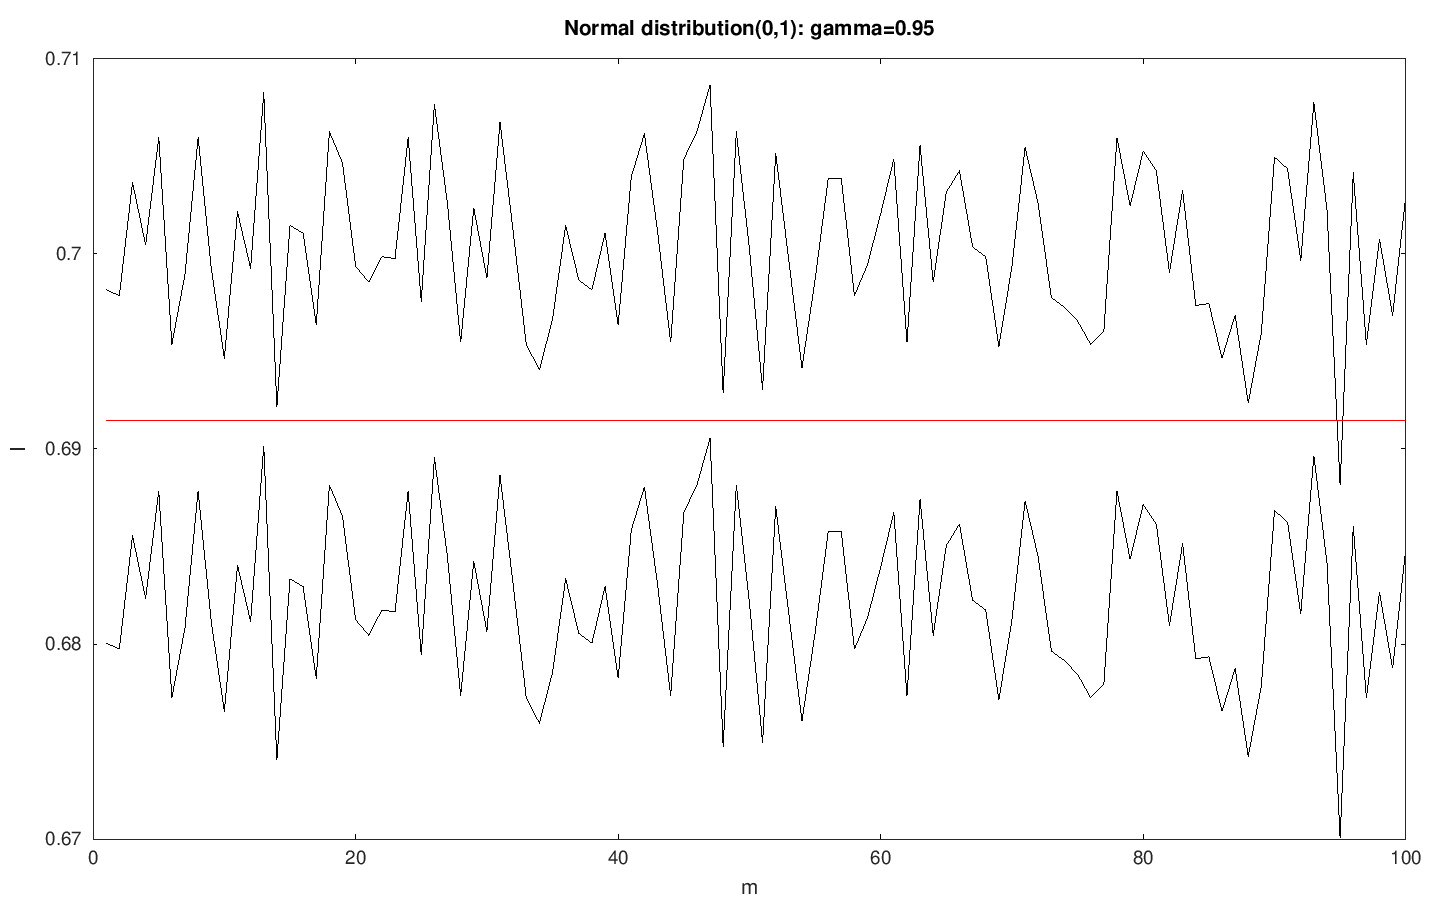

In [21]:
f1 = draw(@(gamma) normal_distribution(gamma));

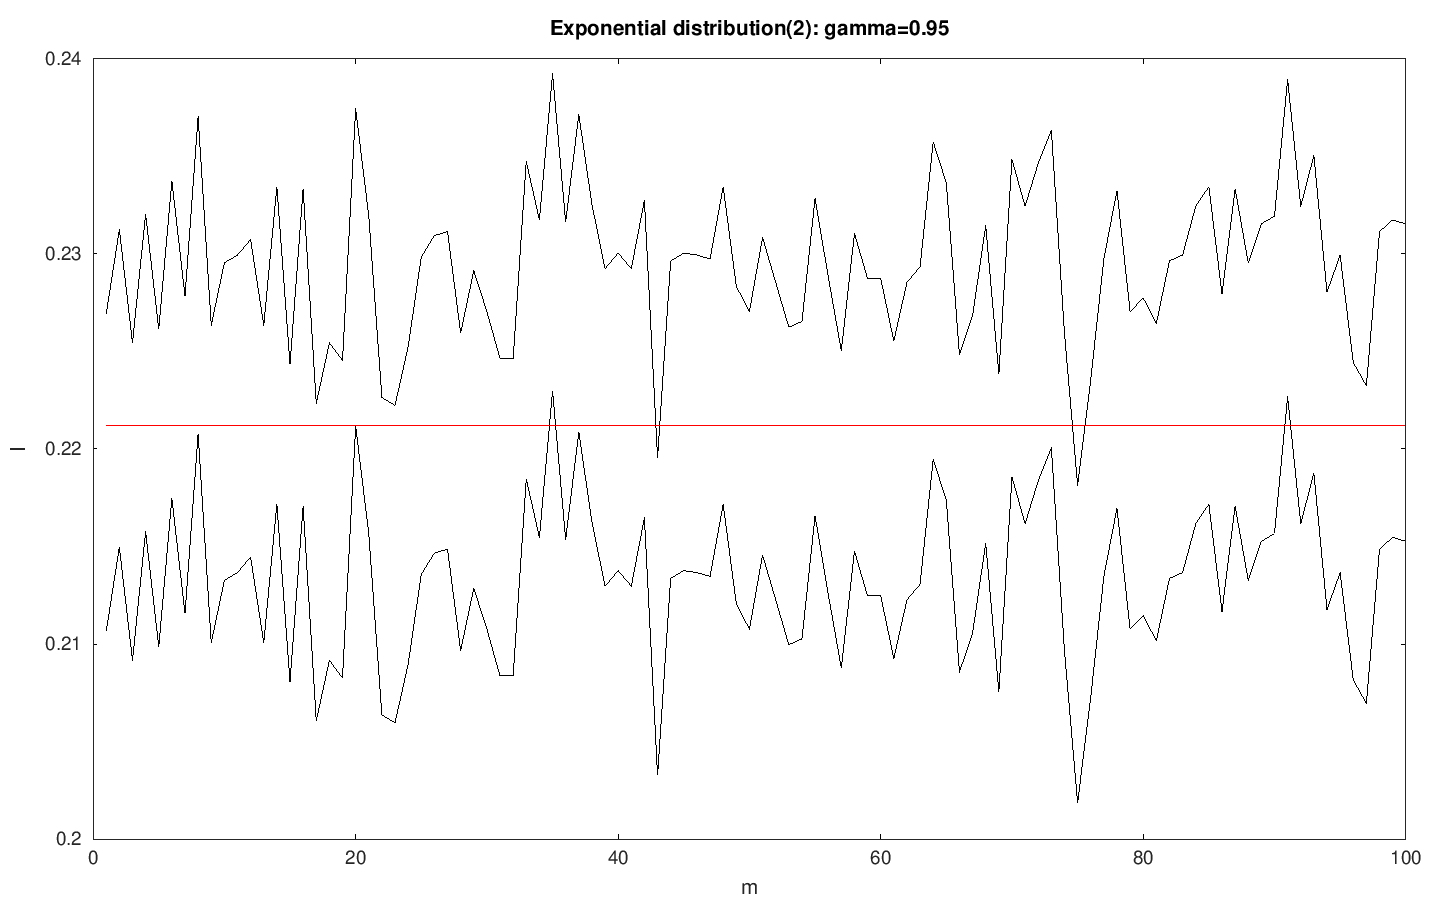

In [22]:
f2 = draw(@(gamma) exponential_distribution(gamma));

### Выводы:
- При увеличении $\gamma$ количество доверительных интервалов, в которые истинное значение не попал уменьшается 
- Увеличивается точность измерений с ростом $\gamma$
> $100 \cdot \gamma + mean() \approx 100$

**Used packages**:
> pkg install -forge struct
>
> pkg install -forge statistics
>
> pkg install -forge optim
>
> pkg install -forge econometrics